In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import seaborn as sns
import sklearn
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [2]:
# read csv
ds = pd.read_csv("/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_30_sec.csv")

# A Basic Exploration of Audio Data's Features
## (useful terms and their definitions)
### Tempo
Tempo is a measurement of the speed of musical compositions, normally denoted using beats per minute (BPM).

### Harmonics
Integers of the fundamental frequency. For example, the first harmonic is the lowest frequency. If we consider a plucked string, the first harmonic can be visualized as a standing wave which has a node at either end.

![harmonic_visualization](https://tghsl3physics.weebly.com/uploads/1/5/4/8/15482154/2803764.jpg?1424074599)[Figure 1](http://tghsl3physics.weebly.com/standing-waves.html)

### Spectral Centroid

Also known as center of spectral mass. The spectral centroid is a measure of the center of mass on a spectrum, and it provides insight into the brightness of a sound.

### Spectral Rolloff

The spectral rolloff point is the measured point where a percentage of the spectrum's total energy is contained below it. Typical percentages are between 85% and 95%. A lower rolloff point can indicate lower frequencies (and more bass), and a higher rolloff point can indicate higher frequencies (and more treble).[[1]](https://musicinformationretrieval.com/spectral_features.html#:~:text=Spectral%20rolloff%20is%20the%20frequency,%2C%20e.g.%2085%25%2C%20lies.)

### Mel Frequency Cepstral Coefficients (MFCCs)
MFCCs are useful in providing context based on human hearing, and in representing timbre (tone quality). The Mel Scale is based off the way humans perceive sound. The first step to developing an MFCC is converting frequency from Hertz to the Mel Scale. The log of the Mel converted frequencies is taken, and a discrete cosine transformation is used on the log's magnitude. This gives us MFCCs in the form of a spectrogram over the Mel frequencies (rather than over time).[[2]](https://towardsdatascience.com/learning-from-audio-the-mel-scale-mel-spectrograms-and-mel-frequency-cepstral-coefficients-f5752b6324a8)

### Zero Crossing Rate (ZCR)
ZCR is the number of times a signal transitions over zero. So the rate at which it goes from positive, to zero, to negative, or vice versa. ZCR is an indicator for noise: a higher ZCR indicates a noisier signal. [[3]](https://www.sciencedirect.com/topics/engineering/zero-crossing-rate)


### Chroma Frequencies
In western music, the musical octave has 12 distinct semitones (chroma). Analysis of chroma frequencies provides us with a visual representation based on musical notes (disregarding octave), which can help find similarities in audio. A chromogram represents the intensity of each chroma over time. [[4]](https://ee.columbia.edu/~dpwe/resources/matlab/chroma-ansyn/)

# Exploratory Data Analysis (EDA)
This will be an analysis and visual exploration of the GTZAN dataset. In data science, EDA helps in discovering patterns or relationships within the data, as well as identifying errors or outlying data. [[5]](https://www.ibm.com/topics/exploratory-data-analysis)

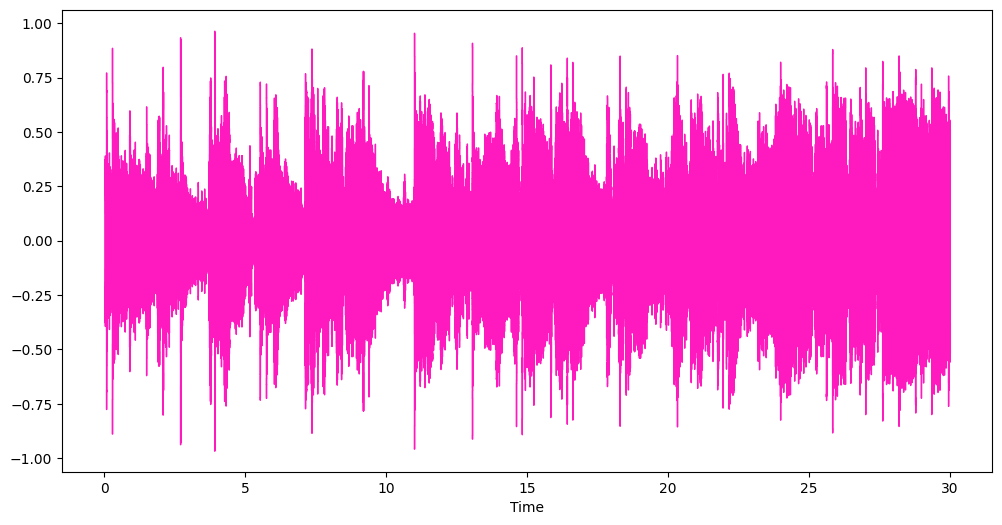

In [3]:
# displaying one of the pop genre audios
audio_file = '/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00012.wav'
plt.figure(figsize=(12,6))
data, sample_rate = librosa.load(audio_file)
librosa.display.waveshow(data, sr=sample_rate, color="#FF1ABF")
ipd.Audio(audio_file)

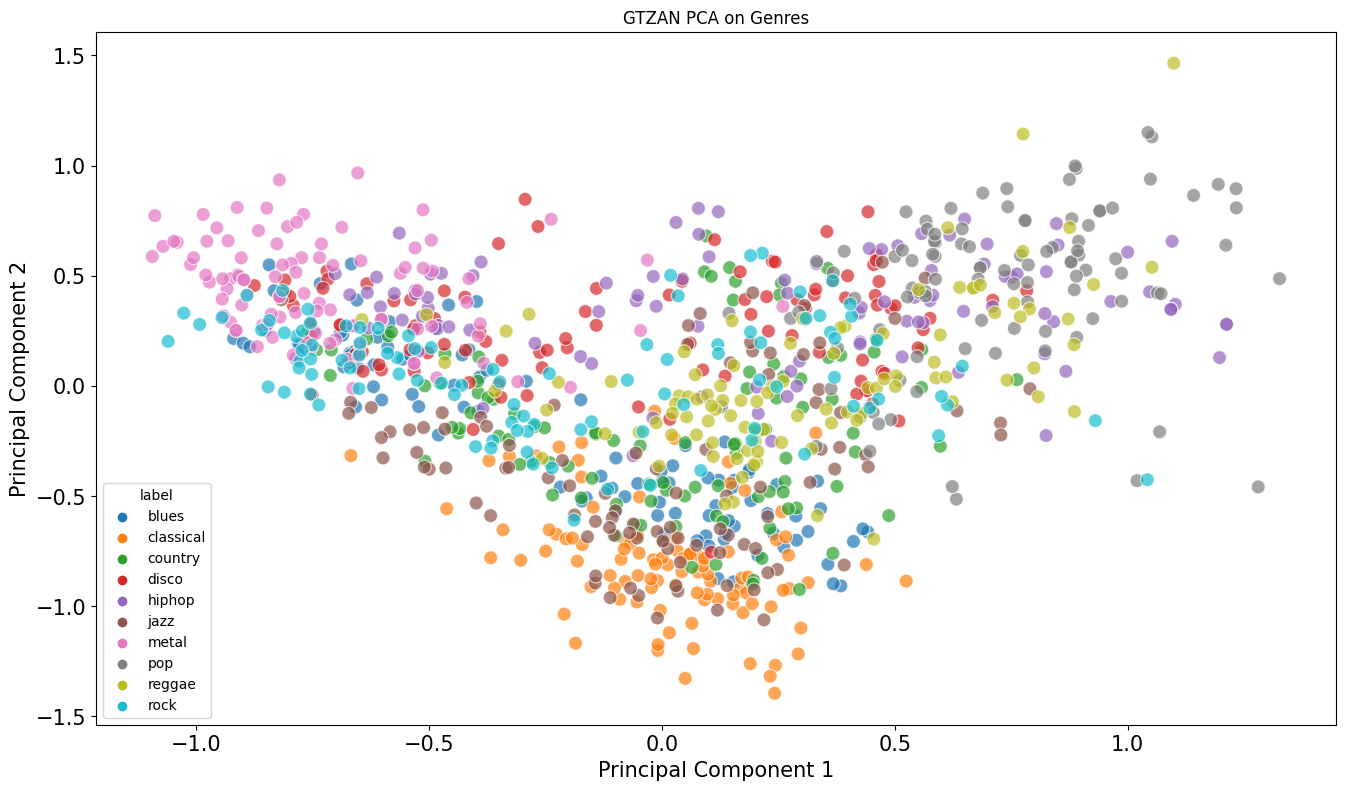

In [4]:
ds = ds.iloc[0:,1:]
y = ds['label']
X = ds.loc[:,ds.columns!='label']
columns = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns=columns)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

finalDf = pd.concat([principalDf, y], axis=1)
plt.figure(figsize=(16, 9))
sns.scatterplot(x="PC1", y="PC2", data=finalDf, hue="label", alpha=0.7, s=100);

plt.title("GTZAN PCA on Genres")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Principal Component 1", fontsize=15)
plt.ylabel("Principal Component 2", fontsize=15)
plt.savefig("PCA Scattert.jpg")

# Sources
\[1\]: https://musicinformationretrieval.com/spectral_features.html#:~:text=Spectral%20rolloff%20is%20the%20frequency,%2C%20e.g.%2085%25%2C%20lies.

\[2\]: https://towardsdatascience.com/learning-from-audio-the-mel-scale-mel-spectrograms-and-mel-frequency-cepstral-coefficients-f5752b6324a8

\[3\]: https://www.sciencedirect.com/topics/engineering/zero-crossing-rate

\[4\]: https://ee.columbia.edu/~dpwe/resources/matlab/chroma-ansyn/

\[5\]: https://www.ibm.com/topics/exploratory-data-analysis

\[Figure 1\]: http://tghsl3physics.weebly.com/standing-waves.html